In [2]:
import numpy as np
import src

In [3]:
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', context='notebook')

# Перша задача, неадаптивні алгоритми

In [4]:
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [6]:
for size in sizes:
    a = src.generate_matrix(size)

    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            operator=lambda x: a.dot(x),
            projector=lambda x: x)

In [7]:
src.save_values_to_table(times, sizes, fn='1/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/iter', tp='iter')

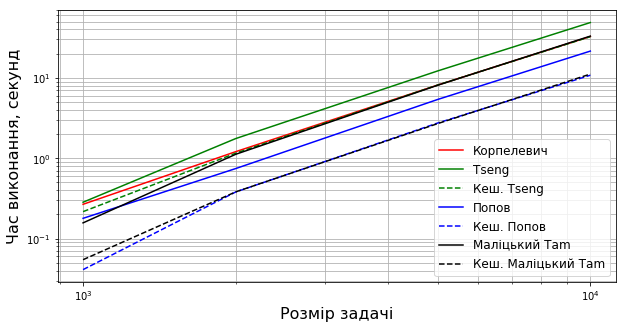

In [8]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/time',
                         styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача, адаптивні алгоритми

In [7]:
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [8]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = src.generate_matrix(size)

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. адапт. Попов:', end=' ')
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print()

Розмір задачі = 1000:
	Адапт. Корпелевич: Took 133 iterations and 0.25 seconds to converge.
	Кеш. адапт. Корпелевич: Took 133 iterations and 0.08 seconds to converge.
	Адапт. Tseng: Took 133 iterations and 0.22 seconds to converge.
	Кеш. адапт. Tseng: Took 133 iterations and 0.08 seconds to converge.
	Адапт. Попов: Took 90 iterations and 0.11 seconds to converge.
	Кеш. адапт. Попов: Took 90 iterations and 0.03 seconds to converge.
	Адапт. Маліцький Tam: Took 92 iterations and 0.15 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 92 iterations and 0.03 seconds to converge.

Розмір задачі = 2000:
	Адапт. Корпелевич: Took 138 iterations and 1.79 seconds to converge.
	Кеш. адапт. Корпелевич: Took 138 iterations and 0.60 seconds to converge.
	Адапт. Tseng: Took 138 iterations and 2.03 seconds to converge.
	Кеш. адапт. Tseng: Took 138 iterations and 0.62 seconds to converge.
	Адапт. Попов: Took 93 iterations and 1.18 seconds to converge.
	Кеш. адапт. Попов: Took 93 iterations and 0.21 s

In [9]:
src.save_values_to_table(times, sizes, fn='1/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/adapt/iter', tp='iter')

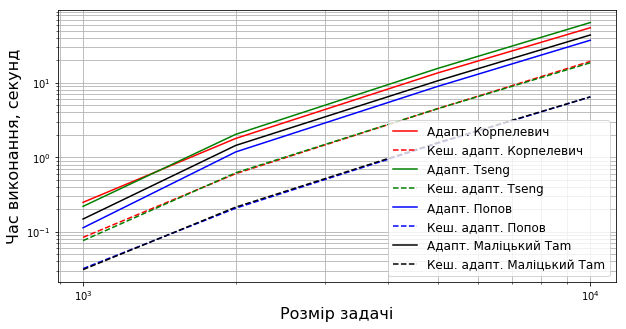

In [10]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача із розрідженими матрицями, неадаптивні алгоритми

In [11]:
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [12]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = src.generate_sparse_matrix(size)

    print('\tКорпелевич:', end=' ')
    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(
            x_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tTseng:', end=' ')
    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. Tseng:', end=' ')
    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(
            x_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tPopov:', end=' ')
    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. Попов:', end=' ')
    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tМаліцький Tam:', end=' ')
    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print('\tКеш. Маліцький Tam:', end=' ')
    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=0.4,
            A=lambda x: a.dot(x),
            ProjectionOntoC=lambda x: x,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)

    print()

Розмір задачі = 50000:
	Корпелевич: Took 159 iterations and 0.07 seconds to converge.
	Tseng: Took 159 iterations and 0.11 seconds to converge.
	Кеш. Tseng: Took 159 iterations and 0.07 seconds to converge.
	Popov: Took 106 iterations and 0.04 seconds to converge.
	Кеш. Попов: Took 106 iterations and 0.03 seconds to converge.
	Маліцький Tam: Took 108 iterations and 0.06 seconds to converge.
	Кеш. Маліцький Tam: Took 108 iterations and 0.04 seconds to converge.

Розмір задачі = 100000:
	Корпелевич: Took 164 iterations and 0.20 seconds to converge.
	Tseng: Took 164 iterations and 0.41 seconds to converge.
	Кеш. Tseng: Took 164 iterations and 0.22 seconds to converge.
	Popov: Took 109 iterations and 0.10 seconds to converge.
	Кеш. Попов: Took 109 iterations and 0.08 seconds to converge.
	Маліцький Tam: Took 111 iterations and 0.28 seconds to converge.
	Кеш. Маліцький Tam: Took 111 iterations and 0.08 seconds to converge.

Розмір задачі = 200000:
	Корпелевич: Took 169 iterations and 1.28 s

In [13]:
src.save_values_to_table(times, sizes, fn='1/sparse/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/sparse/iter', tp='iter')

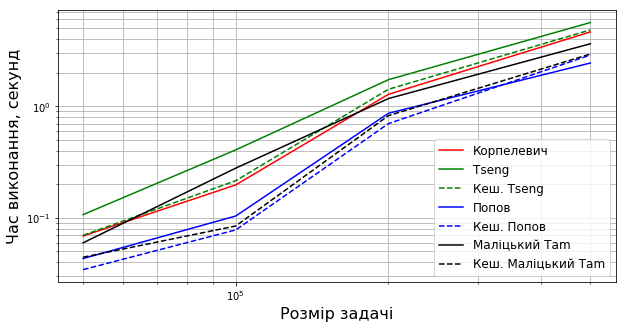

In [14]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/sparse/time',
                         styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача із розрідженими матрицями, адаптивні алгоритми

In [15]:
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [16]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    a = src.generate_sparse_matrix(size)

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                   A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                   tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                          A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                          tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                             A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                             tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                    A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                    tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                             tau=.4, lambda_initial=1,
                             A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                             tolerance=1e-3, max_iterations=1e4, debug=True)

    print("\tКеш. адапт. Попов: ", end="")
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                                    tau=.4, lambda_initial=1,
                                    A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                    tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                     tolerance=1e-3, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=lambda x: a.dot(x), ProjectionOntoC=lambda x: x,
                                            tolerance=1e-3, max_iterations=1e4, debug=True)

    print()

Розмір задачі = 50000:
	Адапт. Корпелевич: Took 160 iterations and 0.21 seconds to converge.
	Кеш. адапт. Корпелевич: Took 160 iterations and 0.15 seconds to converge.
	Адапт. Tseng: Took 160 iterations and 0.45 seconds to converge.
	Кеш. адапт. Tseng: Took 160 iterations and 0.26 seconds to converge.
	Адапт. Попов: Took 108 iterations and 0.37 seconds to converge.
	Кеш. адапт. Попов: Took 108 iterations and 0.15 seconds to converge.
	Адапт. Маліцький Tam: Took 110 iterations and 0.33 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 110 iterations and 0.14 seconds to converge.

Розмір задачі = 100000:
	Адапт. Корпелевич: Took 165 iterations and 1.48 seconds to converge.
	Кеш. адапт. Корпелевич: Took 165 iterations and 0.71 seconds to converge.
	Адапт. Tseng: Took 165 iterations and 0.79 seconds to converge.
	Кеш. адапт. Tseng: Took 165 iterations and 0.34 seconds to converge.
	Адапт. Попов: Took 111 iterations and 0.49 seconds to converge.
	Кеш. адапт. Попов: Took 111 iterations a

In [17]:
src.save_values_to_table(times, sizes, fn='1/sparse/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/sparse/adapt/iter', tp='iter')

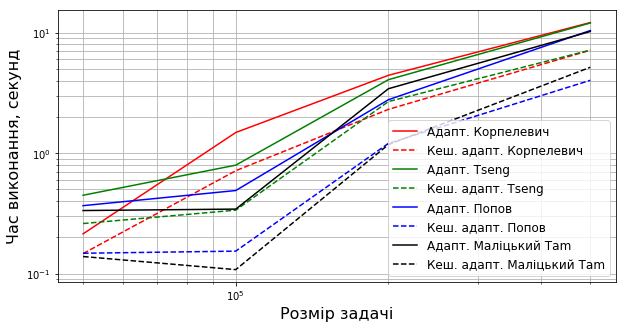

In [18]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/sparse/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Друга задача, неадаптивні алгоритми

In [19]:
def ProjectionOntoProbabilitySymplex(x: np.array) -> np.array:
    """ computes projection onto (scaled) a probability symplex """
    dimensionality = x.shape[0]
    x /= dimensionality
    sorted_x = np.flip(np.sort(x))
    prefix_sum = np.cumsum(sorted_x)
    to_compare = sorted_x + (1 - prefix_sum) / np.arange(1, dimensionality + 1)
    k = 0
    for j in range(1, dimensionality):
        if to_compare[j] > 0:
            k = j
    return dimensionality * np.maximum(np.zeros(dimensionality), x +
                                       (to_compare[k] - sorted_x[k]))

In [20]:
sizes = (100, 200, 500, 1000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [21]:
for size in sizes:
    print(f'Розмір задачі = {size}:')

    for algo in algos:
        iters[algo][size] = []
        times[algo][size] = []

    for _ in range(5):
        print(f'\tTry #{_ + 1}:')

        np.random.seed(_)
        M, q = src.generate_random_matrix(size)

        print('\t\tКорпелевич:', end=' ')
        _, iter_, time_ = src.korpelevich(
            x_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Корпелевич'][size].append(iter_)
        times['Корпелевич'][size].append(time_)

        print('\t\tTseng:', end=' ')
        _, iter_, time_ = src.tseng(
            x_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Tseng'][size].append(iter_)
        times['Tseng'][size].append(time_)

        print('\t\tКеш. Tseng:', end=' ')
        _, iter_, time_ = src.cached_tseng(
            x_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. Tseng'][size].append(iter_)
        times['Кеш. Tseng'][size].append(time_)

        print('\t\tПопов:', end=' ')
        _, iter_, time_ = src.popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Попов'][size].append(iter_)
        times['Попов'][size].append(time_)

        print('\t\tКеш. Попов:', end=' ')
        _, iter_, time_ = src.cached_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. Попов'][size].append(iter_)
        times['Кеш. Попов'][size].append(time_)

        print('\t\tМаліцький Tam:', end=' ')
        _, iter_, time_ = src.malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Маліцький Tam'][size].append(iter_)
        times['Маліцький Tam'][size].append(time_)

        print('\t\tКеш. Маліцький Tam:', end=' ')
        _, iter_, time_ = src.cached_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            lambda_=.4 / np.linalg.norm(M),
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. Маліцький Tam'][size].append(iter_)
        times['Кеш. Маліцький Tam'][size].append(time_)

        print()

    print()

Розмір задачі = 100:
	Try #1:
		Корпелевич: Took 967 iterations and 0.30 seconds to converge.
		Tseng: Took 967 iterations and 0.24 seconds to converge.
		Кеш. Tseng: Took 967 iterations and 0.19 seconds to converge.
		Попов: Took 967 iterations and 0.28 seconds to converge.
		Кеш. Попов: Took 967 iterations and 0.22 seconds to converge.
		Маліцький Tam: Took 967 iterations and 0.55 seconds to converge.
		Кеш. Маліцький Tam: Took 967 iterations and 0.34 seconds to converge.

	Try #2:
		Корпелевич: Took 1151 iterations and 0.78 seconds to converge.
		Tseng: Took 1151 iterations and 0.69 seconds to converge.
		Кеш. Tseng: Took 1151 iterations and 0.54 seconds to converge.
		Попов: Took 1151 iterations and 0.62 seconds to converge.
		Кеш. Попов: Took 1151 iterations and 0.26 seconds to converge.
		Маліцький Tam: Took 1151 iterations and 0.29 seconds to converge.
		Кеш. Маліцький Tam: Took 1151 iterations and 0.17 seconds to converge.

	Try #3:
		Корпелевич: Took 1086 iterations and 0.31 s

		Попов: Took 3471 iterations and 6.66 seconds to converge.
		Кеш. Попов: Took 3471 iterations and 5.80 seconds to converge.
		Маліцький Tam: Took 3471 iterations and 4.74 seconds to converge.
		Кеш. Маліцький Tam: Took 3471 iterations and 3.16 seconds to converge.

	Try #4:
		Корпелевич: Took 3918 iterations and 8.20 seconds to converge.
		Tseng: Took 3918 iterations and 6.61 seconds to converge.
		Кеш. Tseng: Took 3918 iterations and 5.06 seconds to converge.
		Попов: Took 3918 iterations and 8.29 seconds to converge.
		Кеш. Попов: Took 3918 iterations and 7.25 seconds to converge.
		Маліцький Tam: Took 3918 iterations and 7.52 seconds to converge.
		Кеш. Маліцький Tam: Took 3918 iterations and 4.14 seconds to converge.

	Try #5:
		Корпелевич: Took 3907 iterations and 8.41 seconds to converge.
		Tseng: Took 3907 iterations and 7.73 seconds to converge.
		Кеш. Tseng: Took 3907 iterations and 6.37 seconds to converge.
		Попов: Took 3907 iterations and 9.66 seconds to converge.
		Кеш. П

In [22]:
for algo in algos:
    for size in sizes:
        iters[algo][size] = (int(np.mean(iters[algo][size])),
                             int(np.std(iters[algo][size])))
        times[algo][size] = (np.mean(times[algo][size]),
                             np.std(times[algo][size]))

In [23]:
src.save_intervals_to_table(times, sizes, fn='2/time', tp='time')
src.save_intervals_to_table(iters, sizes, fn='2/iter', tp='iter')

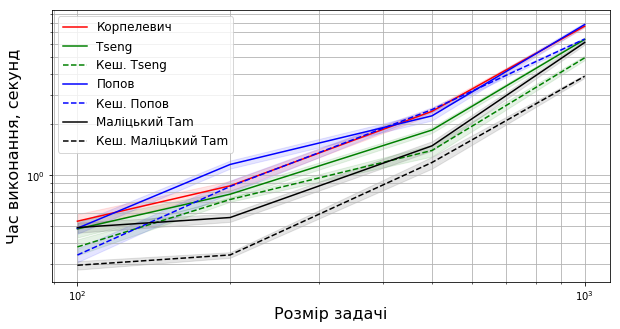

In [24]:
src.save_intervals_to_image(times,
                            sizes,
                            fn='2/time',
                            styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                            #styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                            title='Час виконання, секунд')

# Друга задача, адаптивні алгоритми

In [25]:
sizes = (100, 200, 500, 1000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [26]:
for size in sizes:
    print(f'Розмір задачі = {size}:')

    for algo in algos:
        iters[algo][size] = []
        times[algo][size] = []

    for _ in range(5):
        print(f'\tTry #{_ + 1}:')

        np.random.seed(_)
        M, q = src.generate_random_matrix(size)

        print('\t\tАдапт. Корпелевич:', end=' ')
        _, iter_, time_ = src.adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Адапт. Корпелевич'][size].append(iter_)
        times['Адапт. Корпелевич'][size].append(time_)

        print('\t\tКеш. адапт. Корпелевич:', end=' ')
        _, iter_, time_ = src.cached_adaptive_korpelevich(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. адапт. Корпелевич'][size].append(iter_)
        times['Кеш. адапт. Корпелевич'][size].append(time_)

        print('\t\tАдапт. Tseng:', end=' ')
        _, iter_, time_ = src.adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Адапт. Tseng'][size].append(iter_)
        times['Адапт. Tseng'][size].append(time_)

        print('\t\tКеш. адапт. Tseng:', end=' ')
        _, iter_, time_ = src.cached_adaptive_tseng(
            x_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. адапт. Tseng'][size].append(iter_)
        times['Кеш. адапт. Tseng'][size].append(time_)

        print('\t\tАдапт. Попов:', end=' ')
        _, iter_, time_ = src.adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Адапт. Попов'][size].append(iter_)
        times['Адапт. Попов'][size].append(time_)

        print('\t\tКеш. адапт. Попов:', end=' ')
        _, iter_, time_ = src.cached_adaptive_popov(
            x_initial=np.ones(size),
            y_initial=np.ones(size),
            tau=.4,
            lambda_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. адапт. Попов'][size].append(iter_)
        times['Кеш. адапт. Попов'][size].append(time_)

        print('\t\tАдапт. Маліцький Tam:', end=' ')
        _, iter_, time_ = src.adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Адапт. Маліцький Tam'][size].append(iter_)
        times['Адапт. Маліцький Tam'][size].append(time_)

        print('\t\tКеш. адапт. Маліцький Tam:', end=' ')
        _, iter_, time_ = src.cached_adaptive_malitskyi_tam(
            x0_initial=np.ones(size),
            x1_initial=np.ones(size),
            tau=.4,
            lambda0_initial=1,
            lambda1_initial=1,
            A=lambda x: M.dot(x) + q,
            ProjectionOntoC=ProjectionOntoProbabilitySymplex,
            tolerance=1e-3,
            max_iterations=1e4,
            debug=True)
        iters['Кеш. адапт. Маліцький Tam'][size].append(iter_)
        times['Кеш. адапт. Маліцький Tam'][size].append(time_)

        print()

    print()

Розмір задачі = 100:
	Try #1:
		Адапт. Корпелевич: Took 253 iterations and 0.28 seconds to converge.
		Кеш. адапт. Корпелевич: Took 253 iterations and 0.16 seconds to converge.
		Адапт. Tseng: Took 432 iterations and 0.52 seconds to converge.
		Кеш. адапт. Tseng: Took 432 iterations and 0.25 seconds to converge.
		Адапт. Попов: Took 349 iterations and 0.42 seconds to converge.
		Кеш. адапт. Попов: Took 349 iterations and 0.18 seconds to converge.
		Адапт. Маліцький Tam: Took 464 iterations and 0.49 seconds to converge.
		Кеш. адапт. Маліцький Tam: Took 464 iterations and 0.17 seconds to converge.

	Try #2:
		Адапт. Корпелевич: Took 305 iterations and 0.24 seconds to converge.
		Кеш. адапт. Корпелевич: Took 305 iterations and 0.08 seconds to converge.
		Адапт. Tseng: Took 530 iterations and 0.24 seconds to converge.
		Кеш. адапт. Tseng: Took 530 iterations and 0.11 seconds to converge.
		Адапт. Попов: Took 451 iterations and 0.20 seconds to converge.
		Кеш. адапт. Попов: Took 451 iterat

In [27]:
for algo in algos:
    for size in sizes:
        iters[algo][size] = (int(np.mean(iters[algo][size])),
                             int(np.std(iters[algo][size])))
        times[algo][size] = (np.mean(times[algo][size]),
                             np.std(times[algo][size]))

In [28]:
src.save_intervals_to_table(times, sizes, fn='2/adapt/time', tp='time')
src.save_intervals_to_table(iters, sizes, fn='2/adapt/iter', tp='iter')

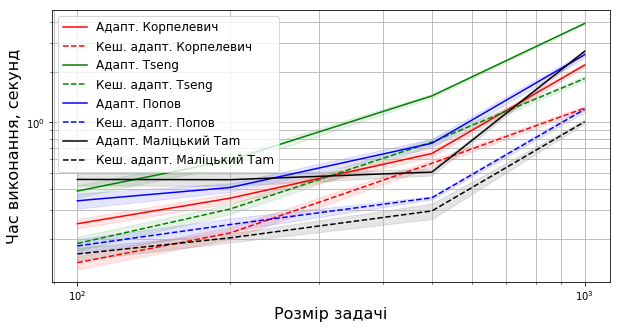

In [29]:
src.save_intervals_to_image(times,
                            sizes,
                            fn='2/adapt/time',
                            styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                            # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                            title='Час виконання, секунд')

# Третя задача

In [58]:
def f(x: np.array) -> np.array:
    """ function for third problem """
    return np.array([
        3 * x[0]**2 + 2 * x[0] * x[1] + 2 * x[1]**2 + x[2] + 3 * x[3] - 6,
        2 * x[0]**2 + x[0] + x[1]**2 + 10 * x[2] + 2 * x[3] - 2,
        3 * x[0]**2 + x[0] * x[1] + 2 * x[1]**2 + 2 * x[2] + 9 * x[3] - 9,
        x[0]**2 + 3 * x[2]**2 + 2 * x[2] + 3 * x[3] - 3
    ])

In [59]:
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [60]:
print('\tАдапт. Корпелевич:', end=' ')
_, iters['Адапт. Корпелевич'], times['Адапт. Корпелевич'] = \
      src.adaptive_korpelevich(x_initial=np.ones(4), tau=.4, lambda_initial=1,
                               A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                               tolerance=1e-6, max_iterations=1e4, debug=True)

print('\tКеш. адапт. Корпелевич:', end=' ')
_, iters['Кеш. адапт. Корпелевич'], times['Кеш. адапт. Корпелевич'] = \
      src.cached_adaptive_korpelevich(x_initial=np.ones(4), tau=.4, lambda_initial=1,
                                      A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                                      tolerance=1e-6, max_iterations=1e4, debug=True)

print('\tАдапт. Tseng:', end=' ')
_, iters['Адапт. Tseng'], times['Адапт. Tseng'] = \
      src.adaptive_tseng(x_initial=np.ones(4), tau=.4, lambda_initial=1,
                         A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                         tolerance=1e-6, max_iterations=1e4, debug=True)

print('\tКеш. адапт. Tseng:', end=' ')
_, iters['Кеш. адапт. Tseng'], times['Кеш. адапт. Tseng'] = \
      src.cached_adaptive_tseng(x_initial=np.ones(4), tau=.4, lambda_initial=1,
                                A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                                tolerance=1e-6, max_iterations=1e4, debug=True)

print('\tАдапт. Попов:', end=' ')
_, iters['Адапт. Попов'], times['Адапт. Попов'] = \
      src.adaptive_popov(x_initial=np.ones(4), y_initial=np.ones(4),
                         tau=.4, lambda_initial=1,
                         A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                         tolerance=1e-6, max_iterations=1e4, debug=True)

print("\tКеш. адапт. Попов: ", end="")
_, iters['Кеш. адапт. Попов'], times['Кеш. адапт. Попов'] = \
      src.cached_adaptive_popov(x_initial=np.ones(4), y_initial=np.ones(4),
                                tau=.4, lambda_initial=1,
                                A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                                tolerance=1e-6, max_iterations=1e4, debug=True)

print('\tАдапт. Маліцький Tam:', end=' ')
_, iters['Адапт. Маліцький Tam'], times['Адапт. Маліцький Tam'] = \
      src.adaptive_malitskyi_tam(x0_initial=np.ones(4), x1_initial=np.ones(4),
                                 tau=.4, lambda0_initial=1, lambda1_initial=1,
                                 A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                                 tolerance=1e-6, max_iterations=1e4, debug=True)

print('\tКеш. адапт. Маліцький Tam:', end=' ')
_, iters['Кеш. адапт. Маліцький Tam'], times['Кеш. адапт. Маліцький Tam'] = \
      src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(4), x1_initial=np.ones(4),
                                        tau=.4, lambda0_initial=1, lambda1_initial=1,
                                        A=f, ProjectionOntoC=ProjectionOntoProbabilitySymplex,
                                        tolerance=1e-6, max_iterations=1e4, debug=True)


	Адапт. Корпелевич: Took 58 iterations and 0.01 seconds to converge.
	Кеш. адапт. Корпелевич: Took 58 iterations and 0.01 seconds to converge.
	Адапт. Tseng: Took 475 iterations and 0.07 seconds to converge.
	Кеш. адапт. Tseng: Took 475 iterations and 0.04 seconds to converge.
	Адапт. Попов: Took 56 iterations and 0.01 seconds to converge.
	Кеш. адапт. Попов: Took 56 iterations and 0.01 seconds to converge.
	Адапт. Маліцький Tam: Took 142 iterations and 0.02 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 142 iterations and 0.01 seconds to converge.


# Четверта задача, адаптивні алгоритми

In [31]:
sizes = (500, 1_000, 2_000, 5_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [32]:
def f(x: np.array) -> np.array:
    """ function for fourth problem """
    y = np.hstack([[0], x, [0]])
    f1 = y[1:-1]**2 + y[:-2]**2 + y[1:-1] * y[:-2] + y[1:-1] * y[2:]
    return f1 + d.dot(x) + c

In [33]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    d, c = src.generate_tridiagonal_matrix(size)

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                   A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                   tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                          A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                          tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.ones(size), tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                             tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print("\tКеш. адапт. Попов: ", end="")
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.ones(size), y_initial=np.ones(size),
                                    tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                     tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                            tolerance=1e-6, max_iterations=1e4, debug=True)

    print()

Розмір задачі = 500:
	Адапт. Корпелевич: Took 111 iterations and 0.19 seconds to converge.
	Кеш. адапт. Корпелевич: Took 111 iterations and 0.07 seconds to converge.
	Адапт. Tseng: Took 558 iterations and 1.11 seconds to converge.
	Кеш. адапт. Tseng: Took 558 iterations and 0.38 seconds to converge.
	Адапт. Попов: Took 87 iterations and 0.14 seconds to converge.
	Кеш. адапт. Попов: Took 87 iterations and 0.03 seconds to converge.
	Адапт. Маліцький Tam: Took 232 iterations and 0.40 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 232 iterations and 0.09 seconds to converge.

Розмір задачі = 1000:
	Адапт. Корпелевич: Took 113 iterations and 0.61 seconds to converge.
	Кеш. адапт. Корпелевич: Took 113 iterations and 0.20 seconds to converge.
	Адапт. Tseng: Took 572 iterations and 2.86 seconds to converge.
	Кеш. адапт. Tseng: Took 572 iterations and 1.04 seconds to converge.
	Адапт. Попов: Took 89 iterations and 0.44 seconds to converge.
	Кеш. адапт. Попов: Took 89 iterations and 0.08 

In [34]:
src.save_values_to_table(times, sizes, fn='4/adapt/time', tp='iter')
src.save_values_to_table(iters, sizes, fn='4/adapt/iter', tp='iter')

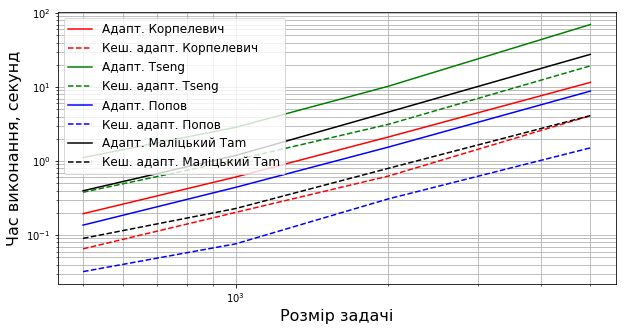

In [35]:
src.save_values_to_image(times,
                         sizes,
                         fn='4/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Четверта задача із розрідженими матрицями, адаптивні алгоритми

In [36]:
sizes = (20_000, 50_000, 100_000, 200_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [37]:
for size in sizes:
    print(f'Розмір задачі = {size}:')
    d, c = src.generate_sparse_tridiagonal_matrix(size)

    print('\tАдапт. Корпелевич:', end=' ')
    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
          src.adaptive_korpelevich(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                                   A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                   tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Корпелевич:', end=' ')
    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
          src.cached_adaptive_korpelevich(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                                          A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                          tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Tseng:', end=' ')
    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
          src.adaptive_tseng(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Tseng:', end=' ')
    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
          src.cached_adaptive_tseng(x_initial=np.zeros(size), tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Попов:', end=' ')
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
          src.adaptive_popov(x_initial=np.zeros(size), y_initial=np.zeros(size),
                             tau=.4, lambda_initial=1,
                             A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                             tolerance=1e-6, max_iterations=1e4, debug=True)

    print("\tКеш. адапт. Попов: ", end="")
    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
          src.cached_adaptive_popov(x_initial=np.zeros(size), y_initial=np.zeros(size),
                                    tau=.4, lambda_initial=1,
                                    A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                    tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tАдапт. Маліцький Tam:', end=' ')
    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
          src.adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                     tau=.4, lambda0_initial=1, lambda1_initial=1,
                                     A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                     tolerance=1e-6, max_iterations=1e4, debug=True)

    print('\tКеш. адапт. Маліцький Tam:', end=' ')
    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
          src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(size), x1_initial=np.ones(size),
                                            tau=.4, lambda0_initial=1, lambda1_initial=1,
                                            A=f, ProjectionOntoC=lambda x: np.maximum(x, np.zeros(x.shape[0])),
                                            tolerance=1e-6, max_iterations=1e4, debug=True)

    print()

Розмір задачі = 20000:
	Адапт. Корпелевич: Took 74 iterations and 0.14 seconds to converge.
	Кеш. адапт. Корпелевич: Took 74 iterations and 0.07 seconds to converge.
	Адапт. Tseng: Took 388 iterations and 0.90 seconds to converge.
	Кеш. адапт. Tseng: Took 388 iterations and 0.33 seconds to converge.
	Адапт. Попов: Took 71 iterations and 0.13 seconds to converge.
	Кеш. адапт. Попов: Took 71 iterations and 0.04 seconds to converge.
	Адапт. Маліцький Tam: Took 262 iterations and 0.55 seconds to converge.
	Кеш. адапт. Маліцький Tam: Took 262 iterations and 0.15 seconds to converge.

Розмір задачі = 50000:
	Адапт. Корпелевич: Took 76 iterations and 0.88 seconds to converge.
	Кеш. адапт. Корпелевич: Took 76 iterations and 0.47 seconds to converge.
	Адапт. Tseng: Took 399 iterations and 4.30 seconds to converge.
	Кеш. адапт. Tseng: Took 399 iterations and 1.58 seconds to converge.
	Адапт. Попов: Took 73 iterations and 1.08 seconds to converge.
	Кеш. адапт. Попов: Took 73 iterations and 0.29 s

In [38]:
src.save_values_to_table(times, sizes, fn='4/sparse/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='4/sparse/adapt/iter', tp='iter')

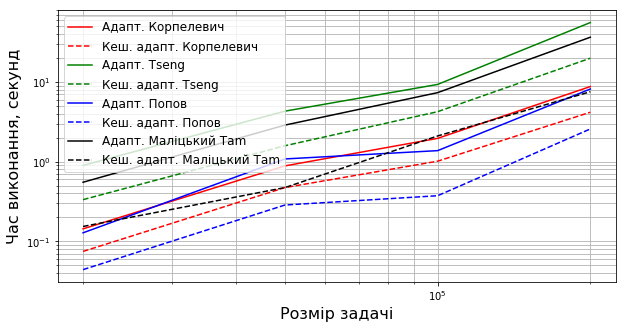

In [39]:
src.save_values_to_image(times,
                         sizes,
                         fn='4/sparse/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# П'ята задача

In [102]:
def f(x: np.array) -> np.array:
    """ function for fifth problem """
    transform = x - np.arange(x.shape[0]) + 1
    exponent = np.exp(np.sum(transform ** 2))
    return 1e-2 * transform * exponent

In [103]:
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [105]:
print('\tАдапт. Корпелевич:', end=' ')
_, iters['Адапт. Корпелевич'], times['Адапт. Корпелевич'] = \
      src.adaptive_korpelevich(x_initial=np.ones(5), tau=.4, lambda_initial=1e-3,
                               A=f, ProjectionOntoC=lambda x: x,
                               tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print('\tКеш. адапт. Корпелевич:', end=' ')
_, iters['Кеш. адапт. Корпелевич'], times['Кеш. адапт. Корпелевич'] = \
      src.cached_adaptive_korpelevich(x_initial=np.ones(5), tau=.4, lambda_initial=1e-3,
                                      A=f, ProjectionOntoC=lambda x: x,
                                      tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print('\tАдапт. Tseng:', end=' ')
_, iters['Адапт. Tseng'], times['Адапт. Tseng'] = \
      src.adaptive_tseng(x_initial=np.ones(5), tau=.4, lambda_initial=2e-5,
                         A=f, ProjectionOntoC=lambda x: x,
                         tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print('\tКеш. адапт. Tseng:', end=' ')
_, iters['Кеш. адапт. Tseng'], times['Кеш. адапт. Tseng'] = \
      src.cached_adaptive_tseng(x_initial=np.ones(5), tau=.4, lambda_initial=2e-5,
                                A=f, ProjectionOntoC=lambda x: x,
                                tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print('\tАдапт. Попов:', end=' ')
_, iters['Адапт. Попов'], times['Адапт. Попов'] = \
      src.adaptive_popov(x_initial=np.ones(5), y_initial=np.ones(5),
                         tau=.4, lambda_initial=2e-5,
                         A=f, ProjectionOntoC=lambda x: x,
                         tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print("\tКеш. адапт. Попов: ", end="")
_, iters['Кеш. адапт. Попов'], times['Кеш. адапт. Попов'] = \
      src.cached_adaptive_popov(x_initial=np.ones(5), y_initial=np.ones(5),
                                tau=.4, lambda_initial=2e-5,
                                A=f, ProjectionOntoC=lambda x: x,
                                tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print('\tАдапт. Маліцький Tam:', end=' ')
_, iters['Адапт. Маліцький Tam'], times['Адапт. Маліцький Tam'] = \
      src.adaptive_malitskyi_tam(x0_initial=np.ones(5), x1_initial=np.ones(5),
                                 tau=.4, lambda0_initial=2e-5, lambda1_initial=2e-5,
                                 A=f, ProjectionOntoC=lambda x: x,
                                 tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)

print('\tКеш. адапт. Маліцький Tam:', end=' ')
_, iters['Кеш. адапт. Маліцький Tam'], times['Кеш. адапт. Маліцький Tam'] = \
      src.cached_adaptive_malitskyi_tam(x0_initial=np.ones(5), x1_initial=np.ones(5),
                                        tau=.4, lambda0_initial=2e-5, lambda1_initial=2e-5,
                                        A=f, ProjectionOntoC=lambda x: x,
                                        tolerance=1e-6, max_iterations=1e5, debug=True)

print(_)


	Адапт. Корпелевич: Took 100000 iterations and 13.37 seconds to converge.
[-0.48845399  0.255773    1.          1.744227    2.48845399]
	Кеш. адапт. Корпелевич: 

KeyboardInterrupt: 